# ROC curves for non-monotonic likelihood ratios

When the likelihood ratio is non-monotonic, computing the ROC curves is no longer a simple matter of evaluating the cumulative distribution function.
Assume, as before, a binary detection problem for two distributions, denoted $p_0(x)$ and $p_1(x)$.
The threshold for detecting distribution 1 is denoted $\tau < \log(p_1(x))-\log(p_0(x))$.
The ROC curve plots the probability of detection versus the probability of false positives for all values of $\tau \in [-\infty,\infty]$.

Consider the particular problem of normal distributions having unequal variances.
The ROC curve can be numerically approximated as follows for values of $\tau \in \tau_k$.
If the likelihood function is convex, then it will have zero, one, or two solutions to the problem $\tau_k = log(p_1(x_k))-\log(p_0(x_k))$.
Let $\tau^*$ indicate the minimum of the log-likelihood ratio.
For $\tau_k <= \tau^*$, the probability of detection is zero, because distribution 0 will always be selected.
For $\tau_k > \tau^*$, there are two zeros to the problem, denoted $x_1$ and $x_2$ with $x_1 < x_2$.
For $x < x_1$ and $x > x_2$ distribution 1 will be detected.
Let $P_0(x)$ and $P_1(x)$ denote the CDF corresponding to $p_0$ and $p_1$.
The, the probability of detection is given as follows: 

\begin{equation}
Pr(detection) = \int_{-\infty}^{x_1} p_1(x) dx + \int_{x_2}^{\infty} p_1(x) dx = P_1(x_1) + 1-P_1(x_2)
\end{equation}

Similarly, the probability of a false positive is given as follows:

\begin{equation}
Pr(false \ positive) = \int_{-\infty}^{x_1} p_0(x) dx + \int_{x_2}^{\infty} p_0(x) dx = P_0(x_1) + 1-P_0(x_2)
\end{equation}

By solving for $x_1$ and $x_2$ over a range of thresholds $\tau_k$, the approximation to the ROC curve can be determined.


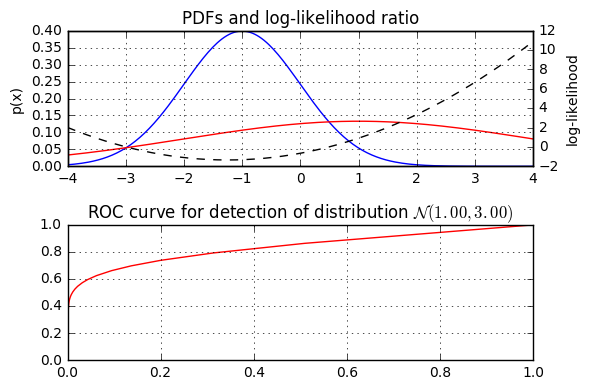

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import scipy.stats

mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)

x = np.linspace(-4, 4, 200)
# compute p1(x)/p0(x) for all x
likelihoodRatio = scipy.stats.norm.logpdf(x,loc=mu1,scale=sigma1)-scipy.stats.norm.logpdf(x,loc=mu0,scale=sigma0)

tauv = np.linspace(-2,12,50)
# minimum of the likelihood ratio
minRat = np.min(likelihoodRatio)
maxRat = np.max(likelihoodRatio)
PDetection = np.zeros(tauv.shape)
PFP = np.zeros(tauv.shape)
# all values below minRat, integrate from -Inf to Inf over p1(x) for p(detection), and over p0(x) for p(false positive)
for k in range(len(tauv)):
    # get the ratio
    tau = tauv[k]
    if tau <= minRat:
        PDetection[k] = 1.0
        PFP[k] = 1.0
    elif tau >= maxRat:# too large, truncate probs to zero
        PDetection[k] = 0.0
        PFP[k] = 0.0
    else:
        # solve for the intercepts
        # ix : where likelihoodRatio is increasing through tau
        ix = np.where((likelihoodRatio[0:-1] < tau) & (likelihoodRatio[1:] >=tau))[0]
        # iy : where likelihoodRatio is decreasing through tau
        iy = np.where((likelihoodRatio[0:-1] > tau) & (likelihoodRatio[1:] <=tau))[0]
        if ix.shape[0] == 0:
            ix = likelihoodRatio.shape[0]
        if iy.shape[0] == 0:
            # set to index zero
            iy = [0]
        #print(tau,ix,iy)
        # for iy: evaluate the CDF at x[iy]
        PDetection[k] = scipy.stats.norm.cdf(x[iy],loc=mu1,scale=sigma1)
        PFP[k] = scipy.stats.norm.cdf(x[iy],loc=mu0,scale=sigma0)
        # for ix: evaluate 1.0-CDF at x[ix]
        PDetection[k] = PDetection[k] + (1.0-scipy.stats.norm.cdf(x[ix],loc=mu1,scale=sigma1))
        PFP[k] = PFP[k] + (1.0-scipy.stats.norm.cdf(x[ix],loc=mu0,scale=sigma0))
        
fig2,ax3 = plt.subplots(2,1)
ax3[0].plot(x,mlab.normpdf(x, mu0, sigma0))
ax3[0].plot(x,mlab.normpdf(x, mu1, sigma1),color='r')
ax2 = ax3[0].twinx()
ax2.plot(x,likelihoodRatio,'k--')
ax3[0].set_ylabel('p(x)')
ax2.set_ylabel('log-likelihood')
ax3[0].grid()
ax3[0].set_title('PDFs and log-likelihood ratio')

ax3[1].plot(PFP,PDetection,'r-')
ax3[1].set_title(r'ROC curve for detection of distribution $\mathcal{N}(%4.2f,%4.2f)$' % (mu1,variance1))
ax3[1].grid()

plt.tight_layout()
plt.show()
